Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems
- Choose a target to predict, and check its distribution
- Choose an appropriate evaluation metric
- Choose what data to hold out for your test set
- Avoid leakage of information from test to train or from target to features

### Setup

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Classification example: Burrito reviews

From the [Logistic Regression assignment](https://nbviewer.jupyter.org/github/LambdaSchool/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/LS_DS_214_assignment.ipynb) (Unit 2, Sprint 1, Module 4)

In [3]:
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

## Choose your target. 

Which column in your tabular dataset will you predict?

In [4]:
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['overall'].describe()

count    421.000000
mean       3.620887
std        0.755718
min        1.000000
25%        3.100000
50%        3.800000
75%        4.100000
max        5.000000
Name: overall, dtype: float64

In [6]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

I've derived my own target to redefine the target (previously 1-5 stars) to a binary classification problem: Predict if a burrito is "Great" or not.

## How is your target distributed?

Classification: How many classes? Are the classes imbalanced?

In [7]:
y = df['Great']
y.nunique()

2

In [8]:
y.value_counts(normalize=True).max()

0.5676959619952494

There are 2 classes, this is a binary classification problem. 

The majority class occurs with 57% frequency, so this is not too imbalanced. I could just use accuracy score as my evaluation metric if I want to.

## Choose your evaluation metric(s)

Precision when predicting great burritos may be most important because I'm only going to eat one, so I want to make sure it's good.

(On the other hand, is a "bad" burriito really that bad? Not to me, not from a taste perspective.)

Which metric would you emphasize if choosing a burrito place to take a first date to? Precision.

Which metric would you emphasize if you are feeling adventurous? Recall. Could mean trying more thing to make sure you don't miss some new, different, great burrito that you otherwise wouldn't have tried.

## Begin to clean and explore your data

How many kinds of burritos?

In [9]:
df['Burrito'].value_counts()

California           101
Carne asada           29
California            26
Carnitas              23
Surf & Turf           14
                    ... 
Barbacoa               1
Colimas burrito        1
Deborah's special      1
Machaca                1
Azteca                 1
Name: Burrito, Length: 132, dtype: int64

In [10]:
df['Burrito'].nunique()

132

In [11]:
df['Burrito'].unique()

array(['California ', 'Carnitas', 'Carne asada', 'California',
       'combo chicken', 'Monster California', 'Carne Asada',
       'Surf & Turf', 'Chile verde pork', 'battered fish ',
       'Surf and turf ', 'Adobada ', 'Barbacoa', '2 in 1', 'Adobado',
       'Shredded beef', 'Hawaiian', 'Bandido', 'Campeon', 'carne asada',
       'California chicken', 'Azteca', 'Lobster', 'Al pastor', 'Custom',
       'Machaca', 'Quesaburro', 'Philly ', 'Quesa', 'Surf and turf',
       'Mahi', 'Addiction', 'Oaxacalifornia', "Deborah's special",
       'Chicken nopalito', 'Adobada', 'Chicken', 'California Everything',
       'Chile relleno and carnitas', 'California (only cheese)', 'Fish',
       'Chimichanga beef', 'Pastor', 'El Hawaiiano ', 'Shrimp',
       'El Rusio', 'Bacon breakfast', 'Chile Relleno', 'Bomb', 'Arizona',
       'California Burrito', '619 Burrito Original', 'Chicken asada',
       'Carne adobada ', 'Bean and cheese', 'Pokirrito classic ',
       'Mauna Lani', 'Especial ', 'Ranchero

Combine burrito categories:

In [12]:
df['Burrito'] = df['Burrito'].str.lower()

In [13]:
california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

In [14]:
df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [15]:
df['Burrito'].value_counts()

California     169
Other          156
Asada           43
Surf & Turf     28
Carnitas        25
Name: Burrito, dtype: int64

Drop some high-cardinality categoricals:

In [16]:
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

Deal with missing values:

In [17]:
df.isna().sum().sort_values()

Burrito       0
overall       0
Tortilla      0
Great         0
Date          0
           ... 
Ham         419
Lobster     420
Zucchini    420
Carrots     420
Queso       421
Length: 61, dtype: int64

In [18]:
df = df.fillna('Missing')

## Choose which observations you will use to train, validate, and test your model

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
train = df[df['Date'].dt.year <= 2016]
val = df[df['Date'].dt.year == 2017]
test = df[df['Date'].dt.year >= 2018]

In [21]:
train.shape, val.shape, test.shape

((298, 61), (85, 61), (38, 61))

## Begin to choose which features, if any, to exclude. Would some features "leak" future information?

What happens if we DON'T drop features with leakage?

In [22]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Great'
features = df.columns.drop([target, 'Date'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


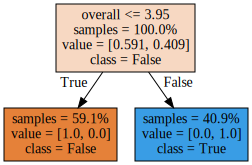

In [23]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [24]:
# Drop feature with "leakage"
df = df.drop(columns=['overall'])

In [25]:
target = 'Great'
features = df.columns.drop([target, 'Date'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8


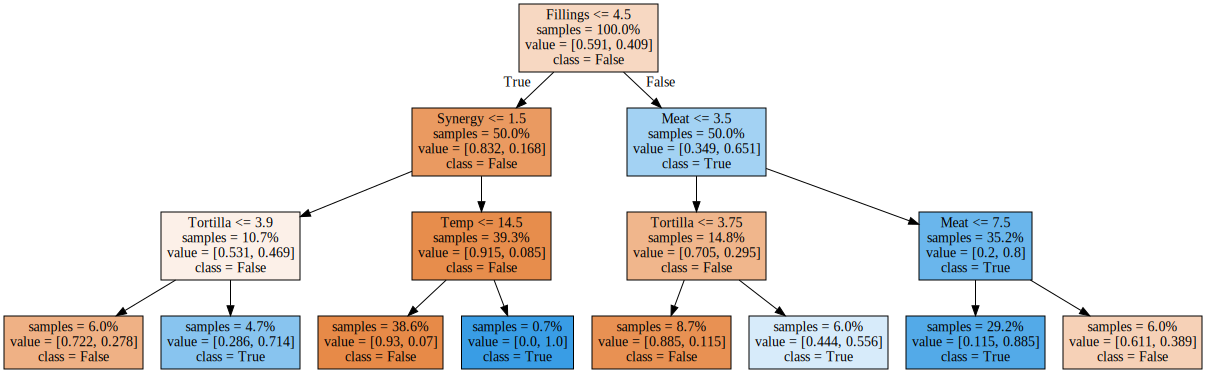

In [26]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

## Get ROC AUC (Receiver Operating Characteristic, Area Under the Curve)

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. **The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.**"

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures **how well a classifier ranks predicted probabilities.** So, when you get your classifier’s ROC AUC score, you need to **use predicted probabilities, not discrete predictions.**

ROC AUC ranges **from 0 to 1.** Higher is better. A naive majority class **baseline** will have an ROC AUC score of **0.5.** 

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [StatQuest video](https://youtu.be/4jRBRDbJemM)
- [Data School article / video](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

In [41]:
# "The ROC curve is created by plotting the true positive rate (TPR)
# against the false positive (FPR)
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPT at various thresholds
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [42]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.885057
1,0.021277,0.605263,0.885057
2,0.106383,0.657895,0.714286
3,0.127660,0.710526,0.555556
4,0.148936,0.736842,0.388889
5,0.255319,0.789474,0.277778
6,0.276596,0.842105,0.115385
7,1.000000,1.000000,0.069565


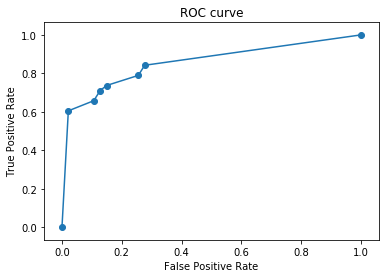

In [43]:
# See the results on a plot.
# This is the "Receiver Operating Characteristic curve"
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [44]:
# Use scikit-learn to calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.8549832026875699

**Recap:** ROC AUC measures how well a classifier ranks predicted probabilities. So, when you get your classifier’s ROC AUC score, you need to use predicted probabilities, not discrete predictions. 

Your code may look something like this:

```python
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test_transformed)[:, -1] # Probability for last class
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))
```

ROC AUC ranges from 0 to 1. Higher is better. A naive majority class baseline will have an ROC AUC score of 0.5.

# Regression example: NYC apartments

In [29]:
# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

## Choose your target

Which column in your tabular dataset will you predict?

In [30]:
y = df['price']

## How is your target distributed?

Regression: Is the target right-skewed?

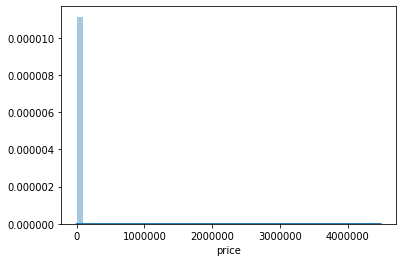

In [32]:
import seaborn as sns
sns.distplot(y);

In [33]:
y.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

## Are some observations outliers? 

Will you exclude
them?

In [34]:
# Yes! There are outliers
# Some prices are so high (or low) it doesn't really make sense.
# Some locations

In [35]:
# Remove the most extreme 1% prices, 
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
import numpy as np
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

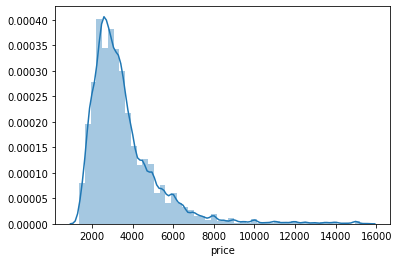

In [36]:
y = df['price']
sns.distplot(y);

In [37]:
y.describe()

count    48817.000000
mean      3579.585247
std       1762.430772
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

## Log-Transform

If the target is right-skewed, you may want to "log transform" the target.

In [38]:
import numpy as np
y_log = np.log1p(y)

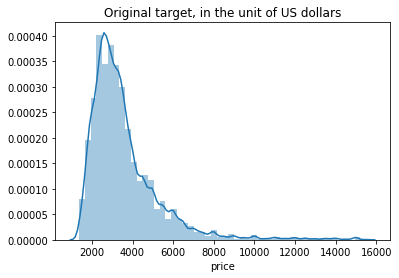

In [45]:
sns.distplot(y)
plt.title('Original target, in the unit of US dollars');

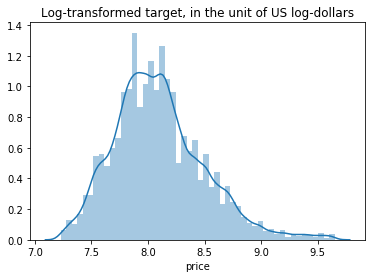

In [46]:
sns.distplot(y_log)
plt.title('Log-transformed target, in the unit of US log-dollars');

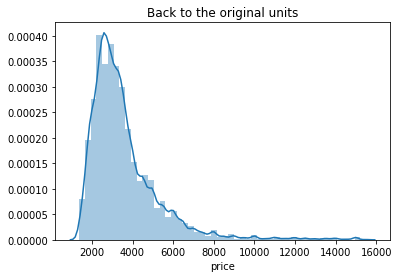

In [48]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');